In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM
from keras.models import Sequential
import warnings
warnings.filterwarnings('ignore')

In [6]:
data = pd.read_csv('RELIANCE.csv')
# data
data.head()

,Date,Symbol,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover
0,1/3/2000,RELIANCE,233.05,237.50,251.70,237.50,251.70,251.70,249.37,4456424,1.111320e+14
1,1/4/2000,RELIANCE,251.70,258.40,271.85,251.30,271.85,271.85,263.52,9487878,2.500220e+14
2,1/5/2000,RELIANCE,271.85,256.65,287.90,256.65,286.75,282.50,274.79,26833684,7.373700e+14
3,1/6/2000,RELIANCE,282.50,289.00,300.70,289.00,293.50,294.35,295.45,15682286,4.633250e+14
4,1/7/2000,RELIANCE,294.35,295.00,317.90,293.00,314.50,314.55,308.91,19870977,6.138390e+14


In [7]:
data.tail()

,Date,Symbol,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover
5301,4/26/2021,RELIANCE,1904.35,1920.00,1962.0,1911.50,1938.00,1937.85,1941.32,9620785,1.867700e+15
5302,4/27/2021,RELIANCE,1937.85,1940.00,1997.2,1938.25,1990.00,1988.65,1978.64,9226547,1.825600e+15
5303,4/28/2021,RELIANCE,1988.65,1997.85,2008.0,1980.15,1993.15,1997.30,1997.60,7902002,1.578510e+15
5304,4/29/2021,RELIANCE,1997.30,2022.90,2044.5,2007.30,2020.00,2024.05,2024.21,8035915,1.626630e+15
5305,4/30/2021,RELIANCE,2024.05,2008.50,2036.0,1987.55,1995.90,1994.50,2010.20,9150974,1.839530e+15


In [8]:
data.shape

(5306, 11)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5306 entries, 0 to 5305
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        5306 non-null   object 
 1   Symbol      5306 non-null   object 
 2   Prev Close  5306 non-null   float64
 3   Open        5306 non-null   float64
 4   High        5306 non-null   float64
 5   Low         5306 non-null   float64
 6   Last        5306 non-null   float64
 7   Close       5306 non-null   float64
 8   VWAP        5306 non-null   float64
 9   Volume      5306 non-null   int64  
 10  Turnover    5306 non-null   float64
dtypes: float64(8), int64(1), object(2)
memory usage: 456.1+ KB


In [10]:
data.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover
count,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5.306000e+03,5.306000e+03
mean,1010.984866,1012.602375,1026.823803,996.886977,1011.157143,1011.316839,1011.937409,5.583028e+06,6.076636e+14
std,570.987079,572.575893,581.986757,560.703328,570.938608,571.046753,571.222520,4.983793e+06,8.368509e+14
min,203.200000,205.500000,219.500000,197.150000,203.300000,203.200000,212.290000,5.282000e+04,4.295540e+12
25%,572.137500,572.925000,582.950000,564.237500,572.062500,572.512500,573.190000,2.836454e+06,2.203352e+14
50%,937.950000,939.000000,950.075000,927.550000,939.025000,938.275000,939.785000,4.213432e+06,3.663000e+14
75%,1247.387500,1247.675000,1267.350000,1227.450000,1248.287500,1248.275000,1247.375000,6.602604e+06,6.656492e+14
max,3220.850000,3298.000000,3298.000000,3141.300000,3223.000000,3220.850000,3197.750000,6.523089e+07,1.470000e+16


In [11]:
data[data['Close'] == data['Prev Close']].shape

(7, 11)

In [16]:
# data = data.drop(['Prev Close'], axis=1)
# data = data.drop(['Symbol'], axis=1)
# data = data.drop(['Last'], axis=1)
# data = data.drop(['VWAP'], axis=1)
data = data.drop(['Turnover'], axis=1)

In [17]:
data.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2000,237.50,251.70,237.50,251.70,4456424
1,1/4/2000,258.40,271.85,251.30,271.85,9487878
2,1/5/2000,256.65,287.90,256.65,282.50,26833684
3,1/6/2000,289.00,300.70,289.00,294.35,15682286
4,1/7/2000,295.00,317.90,293.00,314.55,19870977


In [20]:
data.to_csv('RELIANCE_preprocessed.csv',index= False)
data = data.iloc[::-1]
# data
data.head()

,Date,Open,High,Low,Close,Volume
5305,4/30/2021,2008.50,2036.0,1987.55,1994.50,9150974
5304,4/29/2021,2022.90,2044.5,2007.30,2024.05,8035915
5303,4/28/2021,1997.85,2008.0,1980.15,1997.30,7902002
5302,4/27/2021,1940.00,1997.2,1938.25,1988.65,9226547
5301,4/26/2021,1920.00,1962.0,1911.50,1937.85,9620785


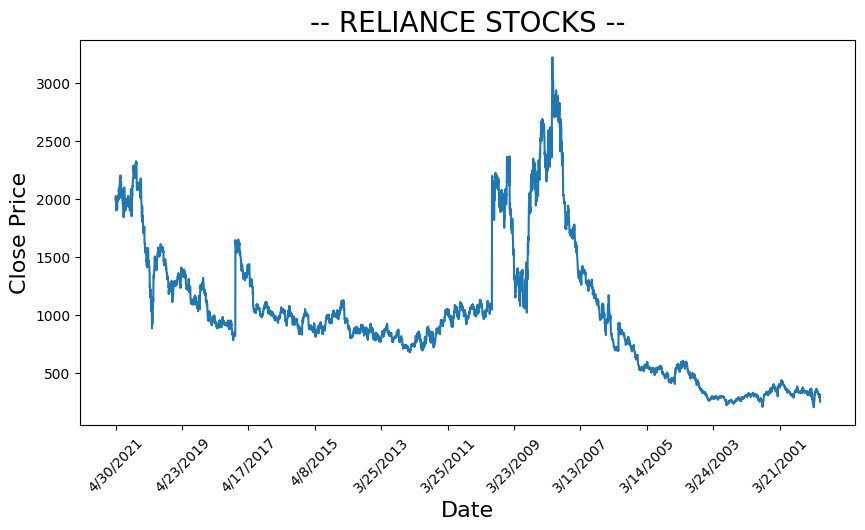

In [23]:
# Plotting closing value

plt.figure(figsize = (10,5))
plt.plot(range(data.shape[0]),(data['Close']))
plt.xticks(range(0,data.shape[0],500),data['Date'].loc[::500],rotation=45)
plt.title('-- RELIANCE STOCKS --', fontsize=20)
plt.xlabel('Date',fontsize=16)
plt.ylabel('Close Price',fontsize=16)
plt.show()

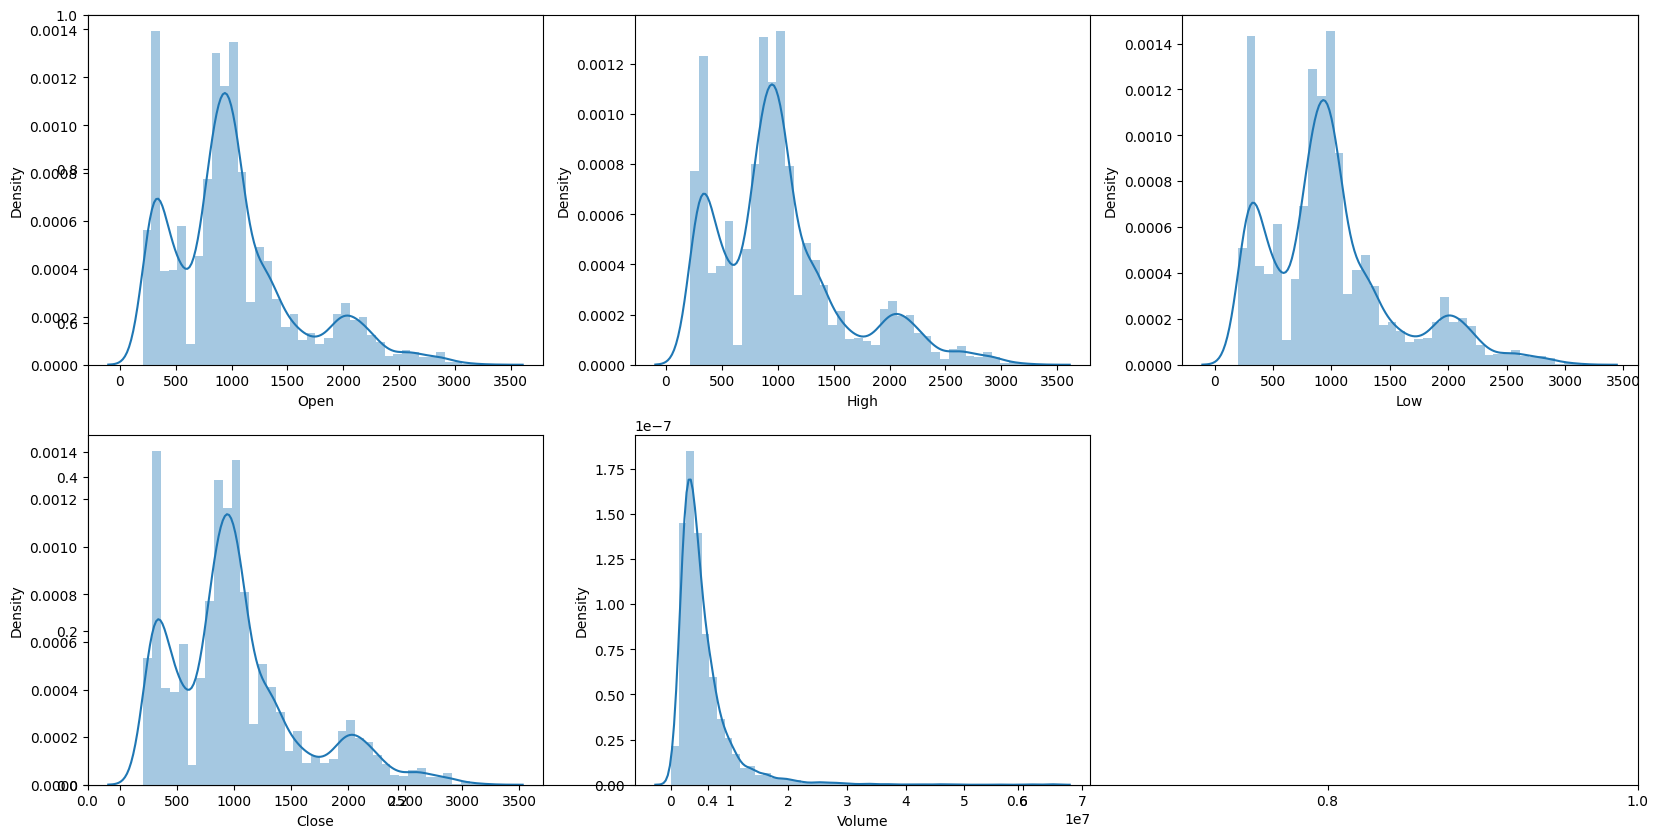

In [27]:
features = ['Open', 'High', 'Low', 'Close', 'Volume']
 
plt.subplots(figsize=(20,10))
 
for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sb.distplot(data[col])
plt.show()

In [28]:
# Moving avg for first 100 days
ma100 = data.Close.rolling(100).mean()
ma100

5305         NaN
5304         NaN
5303         NaN
5302         NaN
5301         NaN
          ...   
4       313.2820
3       312.8510
2       312.2840
1       311.5635
0       310.6425
Name: Close, Length: 5306, dtype: float64

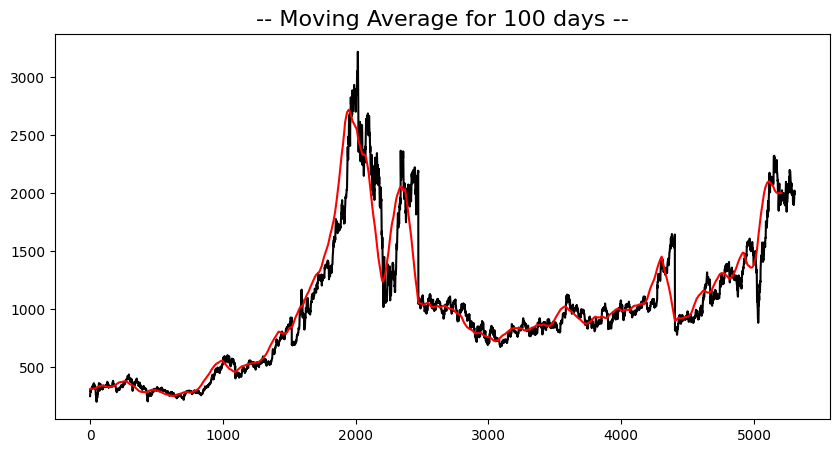

In [33]:
# Plotting moving avg
plt.figure(figsize=(10,5))
plt.title('-- Moving Average for 100 days --', fontsize=16)
plt.plot(data.Close, color = 'black')
plt.plot(ma100, color='red')

In [31]:
# Moving avg for first 200 days
ma200 = data.Close.rolling(200).mean()
ma200

5305          NaN
5304          NaN
5303          NaN
5302          NaN
5301          NaN
          ...    
4       326.83025
3       326.77675
2       326.72575
1       326.65575
0       326.42375
Name: Close, Length: 5306, dtype: float64

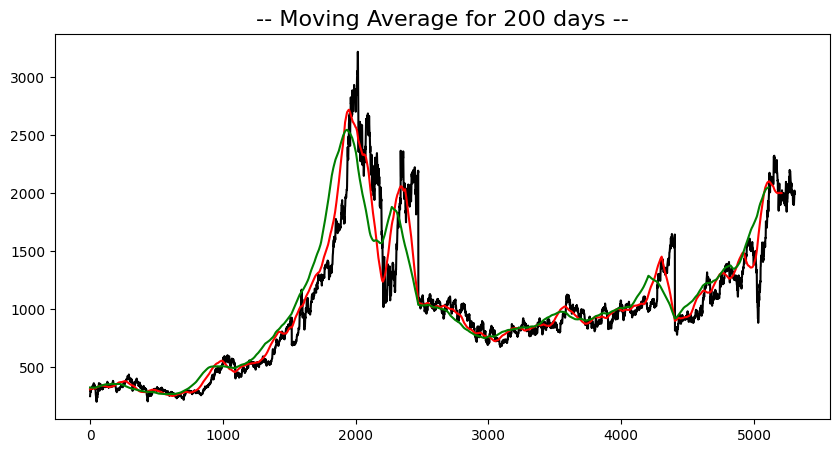

In [34]:
# Plotting moving avg
plt.figure(figsize=(10,5))
plt.title('-- Moving Average for 200 days --', fontsize=16)
plt.plot(data.Close, color = 'black')
plt.plot(ma100, color='red')
plt.plot(ma200, color='green')

In [36]:
# Spliting data into training and testing

dataset_train=data.iloc[0:2500,1:2]
dataset_test=data.iloc[2500:,1:2]
training_set = data.iloc[0:2500, 3:4].values
testing_set=data.iloc[2500:,3:4].values

data.head()



,Date,Open,High,Low,Close,Volume
5305,4/30/2021,2008.50,2036.0,1987.55,1994.50,9150974
5304,4/29/2021,2022.90,2044.5,2007.30,2024.05,8035915
5303,4/28/2021,1997.85,2008.0,1980.15,1997.30,7902002
5302,4/27/2021,1940.00,1997.2,1938.25,1988.65,9226547
5301,4/26/2021,1920.00,1962.0,1911.50,1937.85,9620785


In [37]:
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
len(training_set_scaled)
X_train = []
y_train = []
for i in range(10,2500):
    X_train.append(training_set_scaled[i-10:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [38]:
regressor = Sequential()

regressor.add(LSTM(units = 75, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.1))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.1))

regressor.add(LSTM(units = 75))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

regressor.fit(X_train, y_train, epochs = 5, batch_size = 64)

Epoch 1/5
39/39 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.0415
Epoch 2/5
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0033
Epoch 3/5
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0028
Epoch 4/5
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0026
Epoch 5/5
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0025


In [39]:
regressor.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 10, 75)         │        23,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 10, 75)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 10, 50)         │        25,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 10, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 10, 50)         │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 10, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 75)             │        37,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 75)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            76 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 319,130 (1.22 MB)

 Trainable params: 106,376 (415.53 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 212,754 (831.07 KB)

In [46]:
real_stock_price = testing_set
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 10:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(10,2800):
    X_test.append(inputs[i-10:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


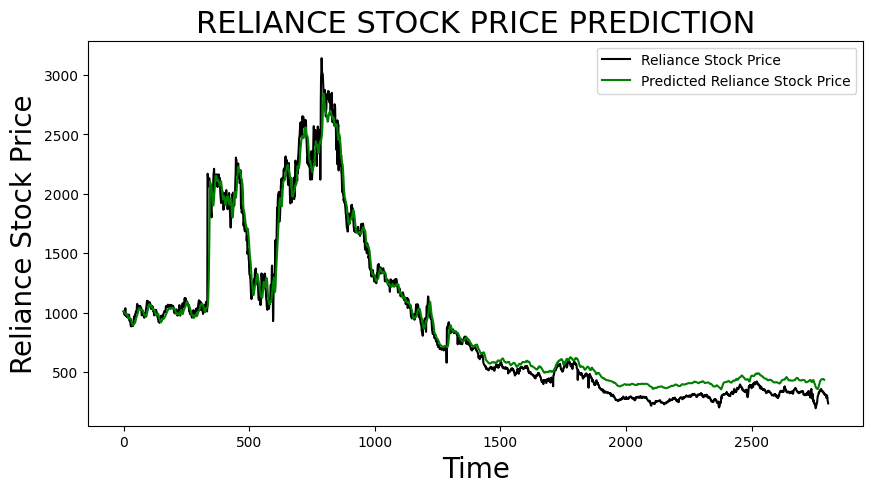

In [47]:

plt.figure(figsize = (10,5))
plt.title('RELIANCE STOCK PRICE PREDICTION', fontsize=22)
plt.xlabel('Time',fontsize=20)
plt.ylabel('Reliance Stock Price',fontsize=20)
plt.plot(real_stock_price, color = 'black', label = 'Reliance Stock Price')
plt.plot(predicted_stock_price, color = 'green', label = 'Predicted Reliance Stock Price')
plt.legend()
plt.show()